In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('../Processes/Interacciones/Interaccion_todasLasSesiones.csv')
a_r = pd.read_csv('../aprobados_reprobados.csv')
resultado = pd.merge(left=data, right=a_r, left_on='Id', right_on='ID',how ='left')

In [3]:
data.shape

(443, 12)

In [4]:
train = data.copy()
#test = data.tail(3)

In [5]:
data.columns

Index(['Sesion', 'Id', 'Study', 'Deeds', 'Texteditor', 'Blank', 'Diagram',
       'Properties', 'Other', 'Aulaweb', 'Fsm', 'Nota'],
      dtype='object')

In [6]:
X=train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']].to_numpy() #Nota

In [7]:
X

array([[  1.,   1.,   1., ...,  57.,   9.,   0.],
       [  1.,   1.,   1., ...,  36.,  14.,   0.],
       [  1.,   1.,   1., ...,  77.,  19.,   0.],
       ...,
       [  1.,   1.,   1., ..., 191.,  73.,   1.],
       [  1.,   1.,   1., ..., 220.,  17.,   1.],
       [  1.,   1.,   1., ..., 155.,  44.,   1.]])

In [8]:
X.shape

(443, 9)

### Normalizan los datos

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [10]:
X_std

array([[ 0.21744269, -0.08428696,  0.04756515, ..., -0.81113337,
        -1.14648014, -0.57126816],
       [ 0.21744269, -0.08428696,  0.04756515, ..., -1.0516195 ,
        -0.96879658, -0.57126816],
       [ 0.21744269, -0.08428696,  0.04756515, ..., -0.58209896,
        -0.79111301, -0.57126816],
       ...,
       [ 0.21744269, -0.08428696,  0.04756515, ...,  0.72339716,
         1.12786949,  1.75049141],
       [ 0.21744269, -0.08428696,  0.04756515, ...,  1.05549705,
        -0.86218644,  1.75049141],
       [ 0.21744269, -0.08428696,  0.04756515, ...,  0.31113523,
         0.09730481,  1.75049141]])

### Cluster

In [11]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pylab as plt


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
def cluster_ac(x, n_clusters, link, aff):
    ac = AgglomerativeClustering(n_clusters=n_clusters, affinity=aff, linkage=link)
    #Se realiza el entrenamientio
    ac.fit(x)
    return ac.labels_

In [13]:
def graficarCS(train, link, metodo='calinski_harabasz'):
    aff=['euclidean','cosine','l1','l2']
    for a in aff:
        print('Con link= %s y affinity= %s '%(link,a))
        cluster = AgglomerativeClustering(affinity=a, linkage=link)
        visualizer = KElbowVisualizer(cluster, k=(2,10), metric=metodo, timings=False)
        visualizer.fit(train)        # Fit the data to the visualizer
        visualizer.show()  

Con link= ward y affinity= euclidean 


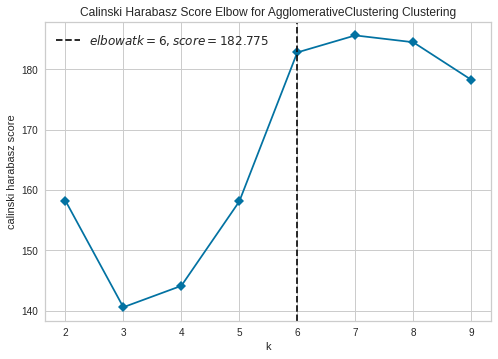

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [14]:
graficarCS(X_std,'ward')

Con link= ward y affinity= euclidean 


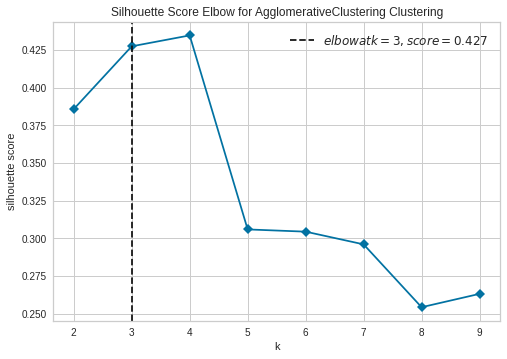

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [16]:
graficarCS(X_std,'ward','silhouette')

Con link= single y affinity= euclidean 


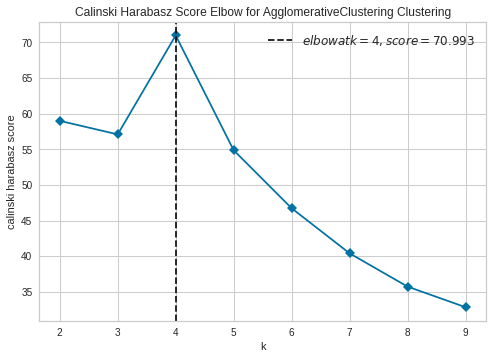

Con link= single y affinity= cosine 


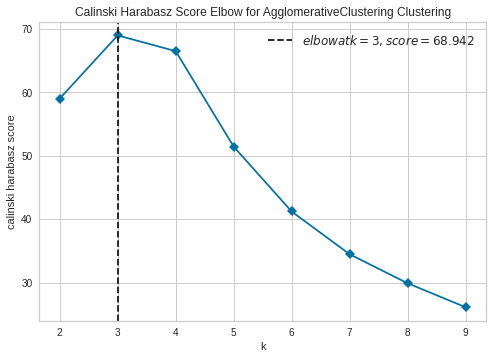

Con link= single y affinity= l1 


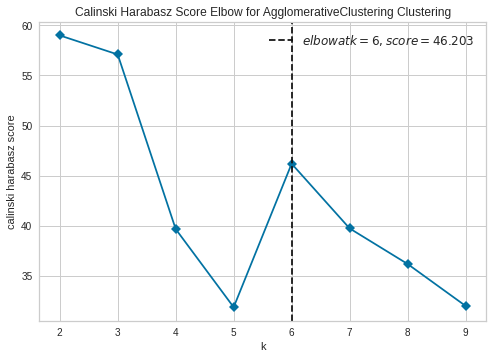

Con link= single y affinity= l2 


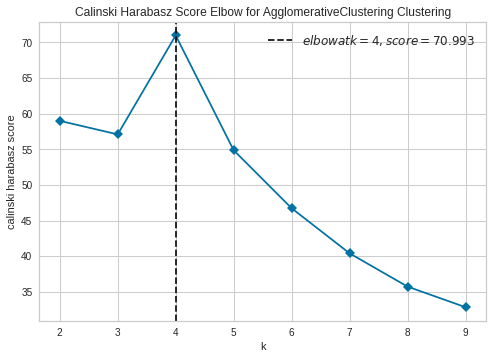

In [17]:
graficarCS(X_std,'single')

Con link= single y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


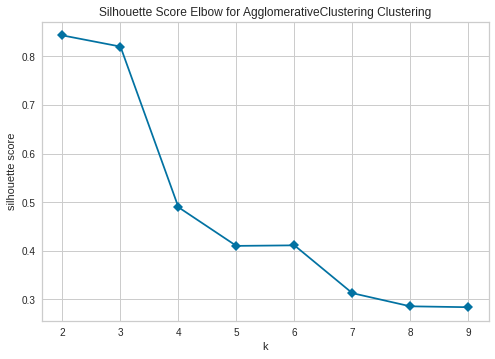

Con link= single y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


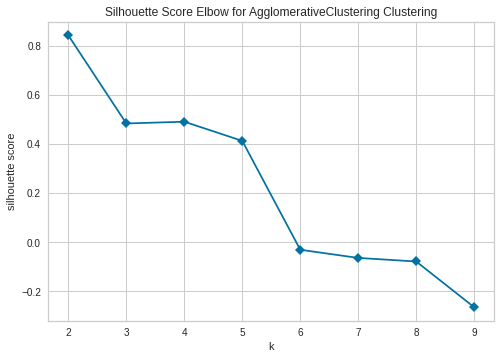

Con link= single y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


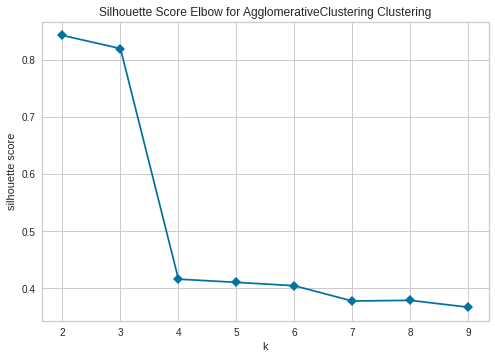

Con link= single y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


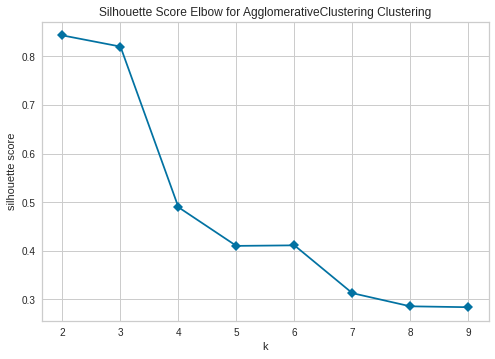

In [18]:
graficarCS(X_std,'single','silhouette')

Con link= complete y affinity= euclidean 


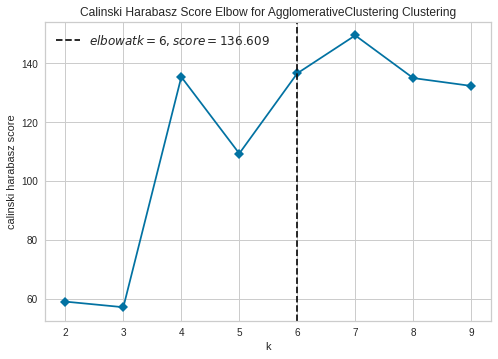

Con link= complete y affinity= cosine 


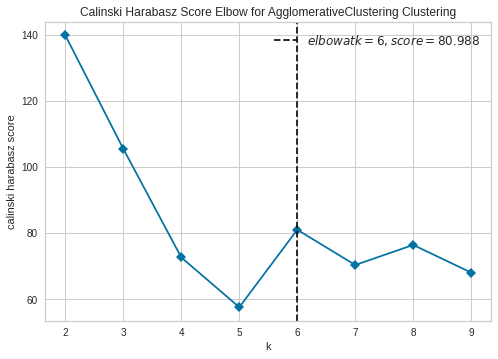

Con link= complete y affinity= l1 


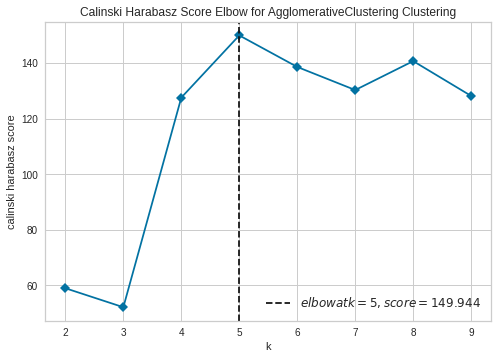

Con link= complete y affinity= l2 


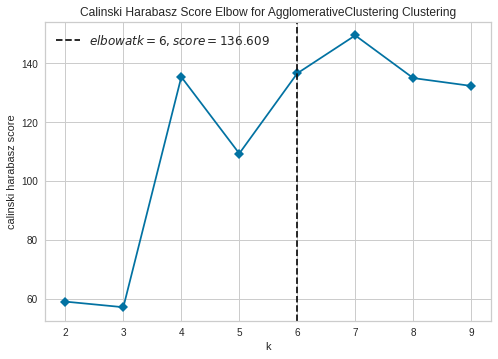

In [19]:
graficarCS(X_std,'complete')

Con link= complete y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


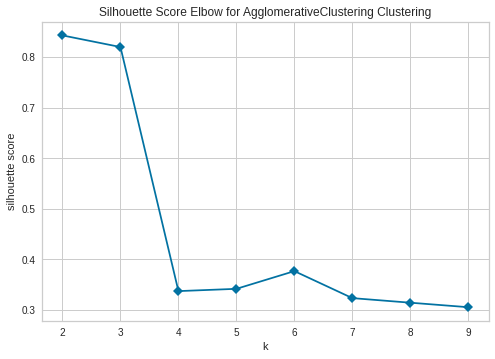

Con link= complete y affinity= cosine 


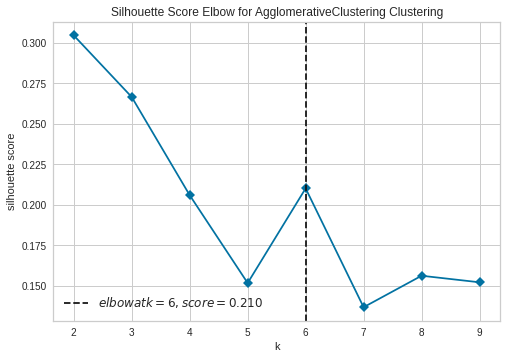

Con link= complete y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


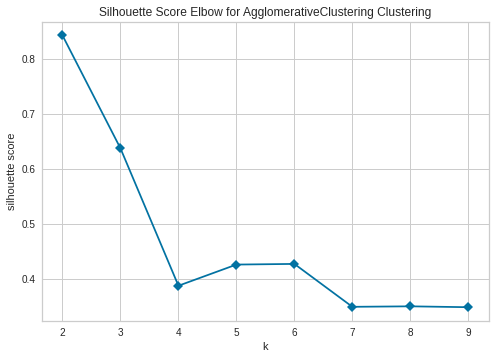

Con link= complete y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


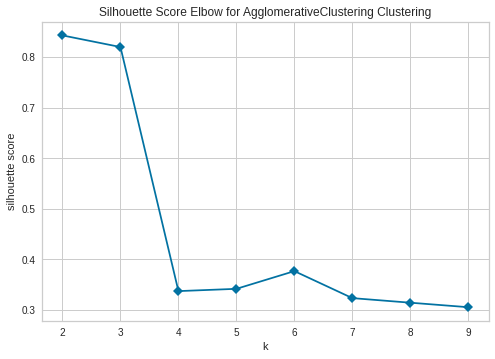

In [20]:
graficarCS(X_std,'complete','silhouette')

Con link= average y affinity= euclidean 


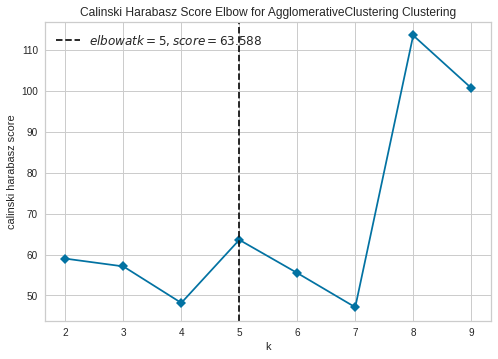

Con link= average y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


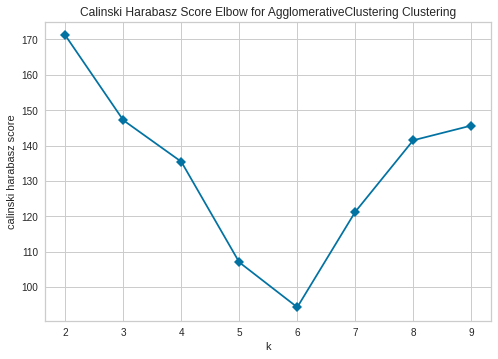

Con link= average y affinity= l1 


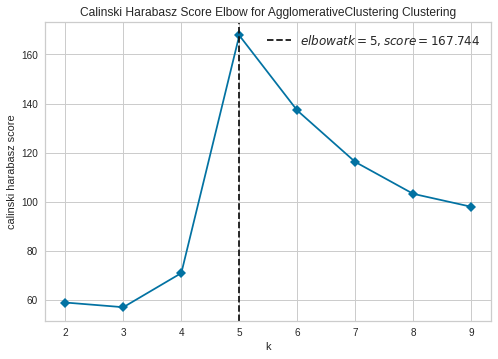

Con link= average y affinity= l2 


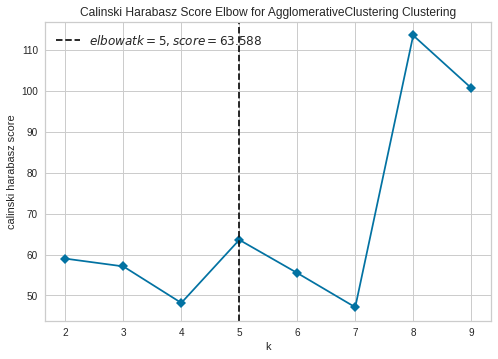

In [21]:
graficarCS(X_std,'average')

Con link= average y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


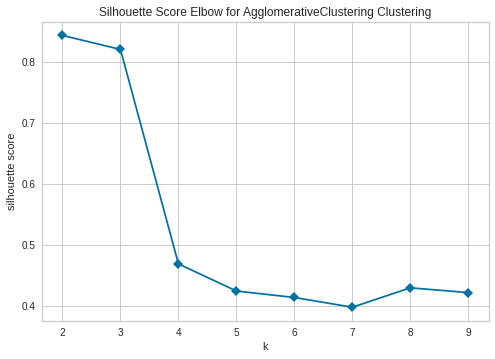

Con link= average y affinity= cosine 


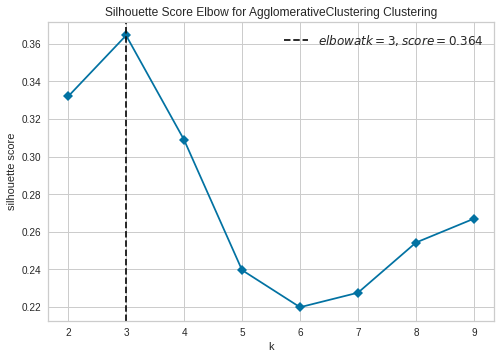

Con link= average y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


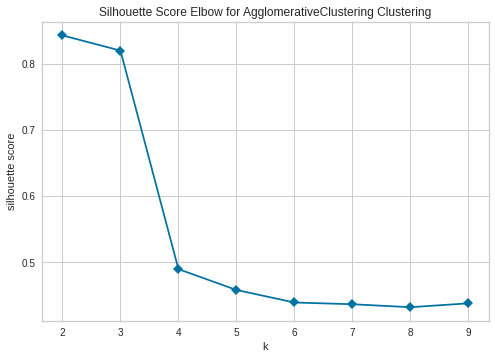

Con link= average y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


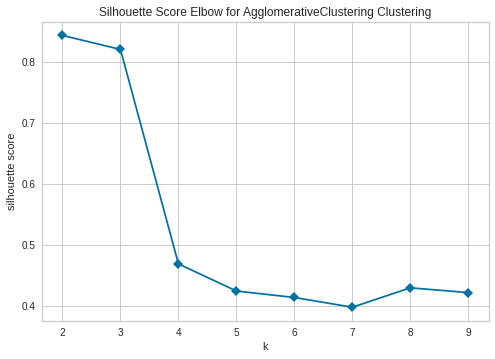

In [22]:
graficarCS(X_std,'average','silhouette')

## Clustering

In [23]:
# single{euclidean: 4, cosine:3, l1:6,l2:4}
# complete cosine 6
# average cosine 4

In [24]:
## mejores opciones obtenidas de acuerdo al silouhette score
#ward = cluster_ac(X_std, 4, 'ward', 'euclidean')
singleE = cluster_ac(X_std, 4, 'single', 'euclidean')
singleC = cluster_ac(X_std, 3, 'single', 'cosine')
singlel1 = cluster_ac(X_std, 6, 'single', 'l1')
singlel2 = cluster_ac(X_std, 4, 'single', 'l2')
# completel1 = cluster_ac(X_std, 9, 'complete', 'l1')
completeC = cluster_ac(X_std, 6, 'complete', 'cosine')
#averageE = cluster_ac(X_std, 3, 'average', 'euclidean')
averageC = cluster_ac(X_std, 4, 'average', 'cosine')
#averagel2 = cluster_ac(X_std, 3, 'average', 'l2')
#averagel1 = cluster_ac(X_std, 4, 'average', 'l1')

## Reducir las dimensiones para visualizar

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [26]:
def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)


In [27]:
results = pd.DataFrame(np.column_stack([reducir_dim_tsne(X_std,2),singleE,singleC,singlel1,singlel2
                                        ,completeC,averageC]), 
                      columns=["x", "y","AGSE",'AGSC','AGSl1','AGSl2', 'AGCC','AGAC'])

## Mostrar los resultados

In [28]:
import seaborn as sns

In [29]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(6,1 , figsize=(20, 100))
    sns.scatterplot(data=res, x="x", y="y", hue="AGSE", ax=ax[0], legend="full")
    ax[0].set_title('AGSE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSC", ax=ax[1], legend="full")
    ax[1].set_title('AGSC')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSl1", ax=ax[2], legend="full")
    ax[2].set_title('AGSl1')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSl2", ax=ax[3], legend="full")
    ax[3].set_title('AGSl2')
    sns.scatterplot(data=res, x="x", y="y", hue="AGCC", ax=ax[4], legend="full")
    ax[4].set_title('AGCC')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAC", ax=ax[5], legend="full")
    ax[5].set_title('AGAC')

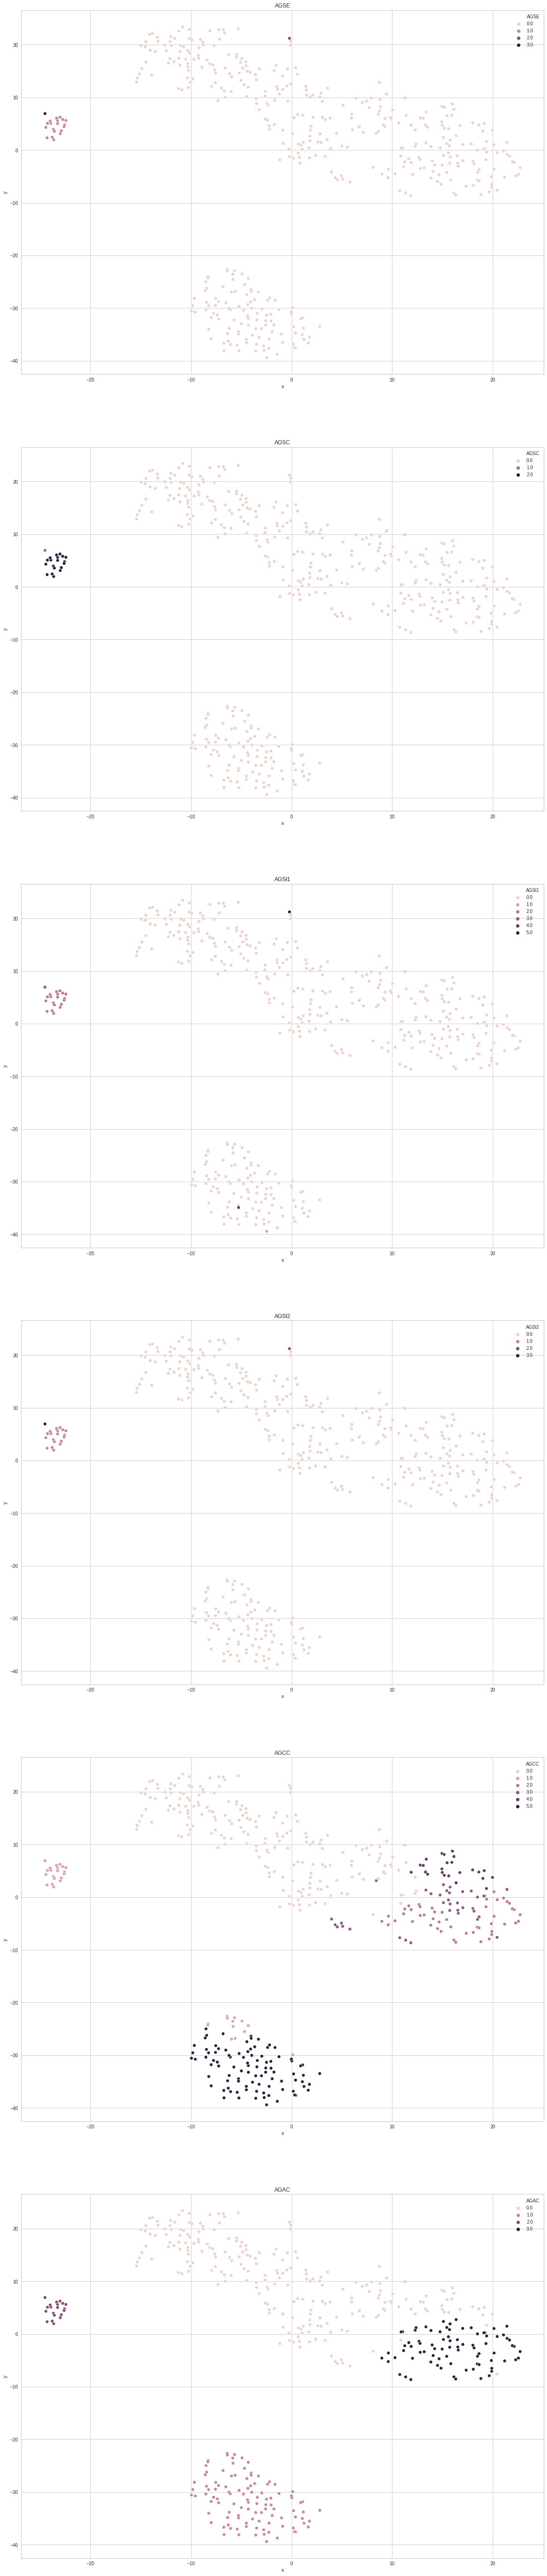

In [30]:
mostrar_resultados(results)

In [31]:
# selecciona el average Cosine 4 

### Obtiene el numero de instancias por cada cluster

In [32]:
def getElements(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    return dict(zip(unique,counts))

In [33]:
getElements(averageC)

{0: 236, 1: 106, 2: 20, 3: 81}

In [34]:
getElements(completeC)

{0: 208, 1: 33, 2: 48, 3: 37, 4: 24, 5: 93}

In [51]:
#getElements(averageC)

## relaciona con aprobados o reprobados

In [35]:
aprobado = resultado[['aprobar']]

In [36]:
columnas = ['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']+['cluster']+list(aprobado.columns)

In [45]:
union1 = pd.DataFrame(np.column_stack([X_std,averageC,aprobado]),columns=columnas)
conteo=union1.groupby(by=['cluster','aprobar']).count()
media = union1.groupby(by=['cluster','aprobar']).mean()
conteo.rename(columns={'Study':'Numero_Estudiantes'}, inplace =True)
conteo= conteo[['Numero_Estudiantes']]
pd.merge(conteo, media, on=['cluster','aprobar'])

Numero_Estudiantes     Study     Deeds  Texteditor   Diagram  \
cluster aprobar                                                                 
0.0     0.0                     119  0.217443 -0.021532    0.047565 -0.672916   
        1.0                     117  0.217443  0.139109    0.047565 -0.584414   
1.0     0.0                      49  0.217443 -0.084287    0.047565  0.636283   
        1.0                      57  0.217443 -0.018780    0.047565  0.993873   
2.0     0.0                      18 -4.598913 -0.084287   -1.123066 -0.480921   
        1.0                       2 -4.598913 -0.084287    0.047565 -0.884617   
3.0     0.0                      33  0.217443 -0.084287    0.047565  0.789515   
        1.0                      48  0.217443 -0.084287    0.047565  0.937430   

                 Properties     Other     Blank   Aulaweb       Fsm  
cluster aprobar                                                      
0.0     0.0       -0.619133 -0.604267 -0.553806 -0.342574 -0.571268  
        1.0       -0.614392 -0.496677 -0.498805 -0.486469 -0.571268  
1.0     0.0        0.915692  0.960412  0.850535  0.946560  1.750491  
        1.0        1.491845  0.903484  0.844142  0.707040  1.750491  
2.0     0.0        0.209042 -0.042815 -0.809861 -1.377469 -0.184308  
        1.0       -0.650870 -1.244936 -1.229121 -1.466311 -0.571268  
3.0     0.0        0.161508  0.346926  0.616167  0.535591 -0.571268  
        1.0        0.163871  0.484838  0.649438  0.438605 -0.571268

In [43]:
union2 = pd.DataFrame(np.column_stack([X_std,completeC,aprobado]),columns=columnas)
union2.groupby(by=['cluster','aprobar']).count()

Study  Deeds  Texteditor  Diagram  Properties  Other  Blank  \
cluster aprobar                                                                
0.0     0.0        109    109         109      109         109    109    109   
        1.0         99     99          99       99          99     99     99   
1.0     0.0         26     26          26       26          26     26     26   
        1.0          7      7           7        7           7      7      7   
2.0     0.0         20     20          20       20          20     20     20   
        1.0         28     28          28       28          28     28     28   
3.0     0.0         14     14          14       14          14     14     14   
        1.0         23     23          23       23          23     23     23   
4.0     0.0          9      9           9        9           9      9      9   
        1.0         15     15          15       15          15     15     15   
5.0     0.0         41     41          41       41          41     41     41   
        1.0         52     52          52       52          52     52     52   

                 Aulaweb  Fsm  
cluster aprobar                
0.0     0.0          109  109  
        1.0           99   99  
1.0     0.0           26   26  
        1.0            7    7  
2.0     0.0           20   20  
        1.0           28   28  
3.0     0.0           14   14  
        1.0           23   23  
4.0     0.0            9    9  
        1.0           15   15  
5.0     0.0           41   41  
        1.0           52   52

In [39]:
for i in range(9):
    print('Cluster: ',i,'  ',getElements(union1[(union1['cluster']==i)].aprobar))

Cluster:  0    {0.0: 119, 1.0: 117}
Cluster:  1    {0.0: 49, 1.0: 57}
Cluster:  2    {0.0: 18, 1.0: 2}
Cluster:  3    {0.0: 33, 1.0: 48}
Cluster:  4    {}
Cluster:  5    {}
Cluster:  6    {}
Cluster:  7    {}
Cluster:  8    {}


In [40]:
for i in range(6):
    print('Cluster: ',i,'  ',getElements(union2[(union2['cluster']==i)].aprobar))

Cluster:  0    {0.0: 109, 1.0: 99}
Cluster:  1    {0.0: 26, 1.0: 7}
Cluster:  2    {0.0: 20, 1.0: 28}
Cluster:  3    {0.0: 14, 1.0: 23}
Cluster:  4    {0.0: 9, 1.0: 15}
Cluster:  5    {0.0: 41, 1.0: 52}


In [35]:
union1[union1['cluster']==0]

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,cluster,aprobar
7,8.842200,-0.109134,-0.390704,-1.095193,-0.859500,-0.865373,-0.429067,-0.462233,-0.122101,0.0,0.0
26,7.080965,0.330941,0.366232,-1.231105,-0.916886,-0.744492,0.352619,-0.382009,-0.122101,0.0,0.0
57,4.780577,-0.227616,0.824659,-1.093535,-0.864282,-0.574769,-0.627142,0.256137,-0.122101,0.0,0.0
64,3.091229,0.009348,-0.369382,-1.107624,-0.931232,-0.751818,-0.489197,-0.338250,-0.122101,0.0,1.0
73,3.342834,-0.244542,-0.401365,-1.106795,-0.806896,-0.704198,-0.542253,-0.236147,-0.122101,0.0,0.0
308,4.780577,-0.244542,-0.390704,0.410609,0.374304,5.052951,0.009526,0.824998,0.292760,0.0,0.0
394,4.780577,-0.244542,-0.390704,0.410609,0.374304,5.059057,0.009526,0.824998,0.292760,0.0,0.0
395,4.133592,-0.227616,1.251102,0.382432,-0.280855,0.718301,0.218211,-0.097578,-0.122101,0.0,1.0


In [44]:
union1.groupby(by=['cluster','aprobar']).mean() & 

Study     Deeds  Texteditor   Diagram  Properties  \
cluster aprobar                                                         
0.0     0.0      0.217443 -0.021532    0.047565 -0.672916   -0.619133   
        1.0      0.217443  0.139109    0.047565 -0.584414   -0.614392   
1.0     0.0      0.217443 -0.084287    0.047565  0.636283    0.915692   
        1.0      0.217443 -0.018780    0.047565  0.993873    1.491845   
2.0     0.0     -4.598913 -0.084287   -1.123066 -0.480921    0.209042   
        1.0     -4.598913 -0.084287    0.047565 -0.884617   -0.650870   
3.0     0.0      0.217443 -0.084287    0.047565  0.789515    0.161508   
        1.0      0.217443 -0.084287    0.047565  0.937430    0.163871   

                    Other     Blank   Aulaweb       Fsm  
cluster aprobar                                          
0.0     0.0     -0.604267 -0.553806 -0.342574 -0.571268  
        1.0     -0.496677 -0.498805 -0.486469 -0.571268  
1.0     0.0      0.960412  0.850535  0.946560  1.750491  
        1.0      0.903484  0.844142  0.707040  1.750491  
2.0     0.0     -0.042815 -0.809861 -1.377469 -0.184308  
        1.0     -1.244936 -1.229121 -1.466311 -0.571268  
3.0     0.0      0.346926  0.616167  0.535591 -0.571268  
        1.0      0.484838  0.649438  0.438605 -0.571268

In [37]:
union2.groupby('cluster').mean()

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,aprobar
cluster,,,,,,,,,,
0.0,-0.187147,-0.150817,0.556461,0.905151,0.924861,0.068212,0.040647,-0.059861,0.253286,0.470149
1.0,-0.130214,-0.228885,-0.370448,-0.259212,-0.342546,-0.232362,1.566001,-0.280270,-0.119508,0.475000
2.0,-0.046962,0.897712,0.047341,-0.095391,-0.090201,1.131834,0.109655,1.099829,-0.085496,0.470588
3.0,-0.346359,-0.149235,-0.339449,-0.946844,-0.860530,-0.437037,-0.424850,-0.306469,-0.120505,0.546154
4.0,2.137409,-0.181792,-0.266412,0.199404,0.080608,-0.295719,-0.220468,-0.228676,-0.117042,0.585366
5.0,-0.338054,-0.178718,-0.293175,0.388111,0.165482,-0.291535,-0.417539,-0.234796,-0.106736,0.518519
